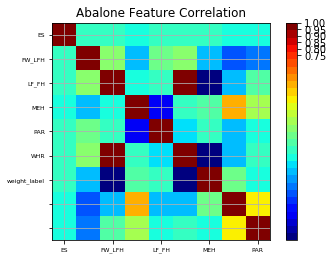

In [5]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics
import seaborn as sns
train = pd.read_csv('Data/fulldataset.csv')
df = pd.DataFrame(train)
#print(df)
df['weight_label']=0
df=df.dropna()
#print(df)

def label_race (row):
   if row['bmi']< 18.5 :
       
       return 'Underweight'
   elif row['bmi']>18.5 and row['bmi']<24.9:
        return 'Healthy'
   elif row['bmi']>25 and row['bmi']<29.9:
        return 'Overweight'
   else:
    return 'Obese'


df['weight_label'] = df.apply (lambda row: label_race(row),axis=1)


def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['CJWR','ES','FW_LFH','LF_FH','MEH','PAR','WHR','weight_label']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

In [6]:
X=df[['CJWR','ES','LF_FH','MEH','PAR','WHR']]
Y=df[['weight_label']]
print(X)

X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33, random_state=0)


             MEH
0      35.964674
1      37.074287
2      53.638591
3      26.537562
4      12.183614
5     121.153758
6      30.074637
7      11.264813
8       7.523328
9      59.167420
10     18.414451
11     12.727693
12     75.167610
13      4.751161
14     12.682330
15     36.245242
16     22.663113
17      9.389478
18     47.557522
19      7.838946
20     54.195396
21     39.604056
22     19.619467
23     47.842861
24     19.244075
25     12.281285
26     23.834291
27     40.942695
28     26.611603
29     39.568351
...          ...
4175   28.049008
4176   10.128582
4177   50.942209
4178   35.786573
4179   18.434733
4180   19.772012
4181   86.473449
4182   17.024121
4183   74.645341
4184    6.285921
4185    4.103168
4186  340.026681
4187   18.145063
4188   79.883967
4189   11.967609
4190  107.722870
4191   26.078923
4192   38.571083
4193   23.518297
4194   16.045755
4195   18.209659
4196   23.260305
4197   14.220580
4198   12.972170
4199   39.748583
4200   13.421249
4201    7.3600

In [7]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)



# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5681818181818182
